In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from hmmlearn.hmm import GaussianHMM

%matplotlib inline

In [71]:
df_prices = pd.read_csv('../data/S&P500_Sectors.csv', index_col=0, parse_dates=True)
df_returns = (df_prices.apply(np.log).diff().apply(np.exp) - 1).ix[1:]
df_returns

energy  materials  industrial  cons_discretionary  cons_staple  \
Date                                                                           
2001-10-10  0.035122   0.025355    0.025932            0.031142     0.011182   
2001-10-11 -0.004094   0.032506    0.024393            0.034442    -0.008294   
2001-10-12  0.000502  -0.005948   -0.007965           -0.012844    -0.011894   
2001-10-15 -0.020998  -0.007579    0.000455           -0.000277    -0.003762   
2001-10-16  0.009185   0.009164    0.000000            0.005585    -0.001935   
2001-10-17 -0.006145  -0.016568   -0.025978           -0.031990    -0.006148   
2001-10-18 -0.030682  -0.006399   -0.002378           -0.009672     0.006043   
2001-10-19  0.004700  -0.005462    0.000426            0.014459     0.014284   
2001-10-22  0.014177   0.026148    0.012894            0.008165     0.010445   
2001-10-23 -0.002495   0.005192   -0.003949            0.007630    -0.004846   
2001-10-24 -0.009767  -0.003497    0.002826           -0.008595    -0.003617   
2001-10-25  0.019299   0.006140    0.016235            0.011575     0.004654   
2001-10-26  0.019868   0.010066    0.017176            0.007366     0.005837   
2001-10-29 -0.005501  -0.017655   -0.032551           -0.033110    -0.010870   
2001-10-30 -0.030282  -0.013340   -0.021660           -0.022781    -0.007264   
2001-10-31 -0.004135  -0.010929    0.002149            0.012654    -0.002345   
2001-11-01  0.020046   0.020218    0.027153            0.023838     0.014716   
2001-11-02 -0.021991   0.013559    0.010775            0.011454     0.007135   
2001-11-05 -0.006794   0.002929    0.017849            0.021998     0.005245   
2001-11-06 -0.002746   0.016101    0.013964            0.020435     0.004988   
2001-11-07  0.002415   0.004583   -0.003003           -0.010814    -0.001275   
2001-11-08  0.009541  -0.003325    0.011926            0.013272    -0.010852   
2001-11-09  0.023054   0.004112    0.000238            0.004040     0.001152   
2001-11-12 -0.008538  -0.011126   -0.013449           -0.003538    -0.000506   
2001-11-13  0.011576   0.024221    0.021272            0.028402     0.006449   
2001-11-14 -0.050891   0.017316    0.007796            0.019030     0.007506   
2001-11-15 -0.044454   0.009673    0.009650            0.008469     0.003952   
2001-11-16  0.014618  -0.003713   -0.004334           -0.011715    -0.000905   
2001-11-19 -0.004600   0.015654    0.012359            0.021372    -0.002310   
2001-11-20  0.034535  -0.004991   -0.008638           -0.014185    -0.002497   
...              ...        ...         ...                 ...          ...   
2016-10-25 -0.005271  -0.009931   -0.003989           -0.011873     0.002951   
2016-10-26  0.002844  -0.001058    0.004147           -0.004276    -0.000019   
2016-10-27 -0.003303  -0.000649   -0.007309           -0.008652    -0.005052   
2016-10-28 -0.004444   0.001572    0.006445           -0.002254     0.004687   
2016-10-31 -0.011512   0.000648    0.001925            0.001404     0.002111   
2016-11-01  0.000951  -0.004570   -0.008130           -0.008396    -0.004730   
2016-11-02 -0.010111  -0.005824   -0.004017           -0.005753    -0.001745   
2016-11-03  0.003698  -0.000103   -0.002805           -0.002468    -0.006453   
2016-11-04 -0.004840   0.003412    0.001704           -0.002179    -0.009845   
2016-11-07  0.021814   0.014322    0.024472            0.023057     0.017447   
2016-11-08 -0.000176   0.003284    0.005862            0.004784     0.004533   
2016-11-09  0.015162   0.021262    0.023589            0.001837    -0.013260   
2016-11-10  0.003087   0.009914    0.020558            0.003317    -0.027945   
2016-11-11 -0.016582  -0.013154    0.002875            0.006405    -0.001600   
2016-11-14  0.003501   0.002122    0.004139           -0.000632    -0.002704   
2016-11-15  0.026842   0.004202    0.003309            0.003398     0.006952   
2016-11-16 -0.008751  -0.001153   -0.006652            0.005449    -0.000115   
2016-11-17 -0.

energy    materials   industrial  cons_discretionary  cons_staple  \
count  3817.000000  3817.000000  3817.000000         3817.000000  3817.000000   
mean      0.000394     0.000377     0.000312            0.000396     0.000270   
std       0.016979     0.015621     0.013418            0.013663     0.008763   
min      -0.155353    -0.121324    -0.088032           -0.096059    -0.064323   
25%      -0.007763    -0.006961    -0.005686           -0.005671    -0.004223   
50%       0.000636     0.000836     0.000604            0.000721     0.000500   
75%       0.009140     0.008460     0.006775            0.007009     0.004727   
max       0.184835     0.132843     0.099840            0.131033     0.092374   

        healthcare   financials           it      telecom    utilities  \
count  3817.000000  3817.000000  3817.000000  3817.000000  3817.000000   
mean      0.000248     0.000245     0.000385     0.000063     0.000174   
std       0.010939     0.020055     0.015158     0.013755     0.012206   
min      -0.071469    -0.170050    -0.092173    -0.098056    -0.086034   
25%      -0.004885    -0.006899    -0.006545    -0.006212    -0.005510   
50%       0.000502     0.000480     0.000826     0.000156     0.000835   
75%       0.005804     0.007425     0.007360     0.006486     0.006532   
max       0.124266     0.187693     0.121436     0.137988     0.135235   

       real_estate  
count  3817.000000  
mean      0.000378  
std       0.020888  
min      -0.184723  
25%      -0.007098  
50%       0.000770  
75%       0.007979  
max       0.207450

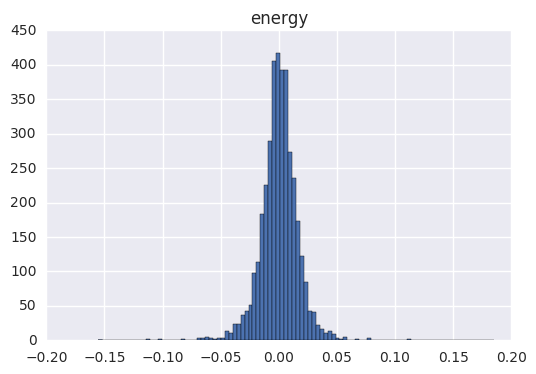

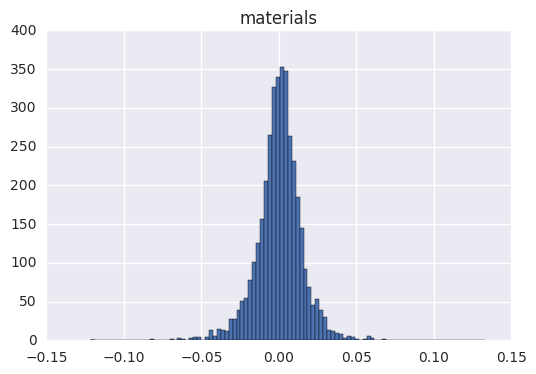

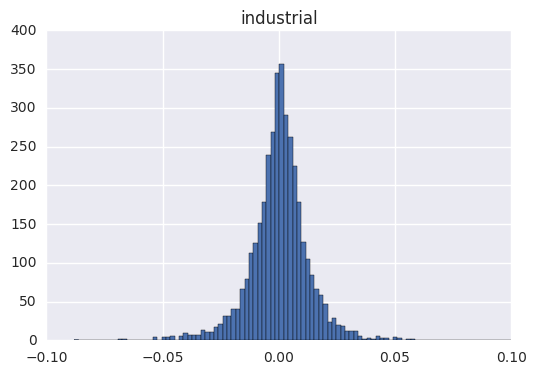

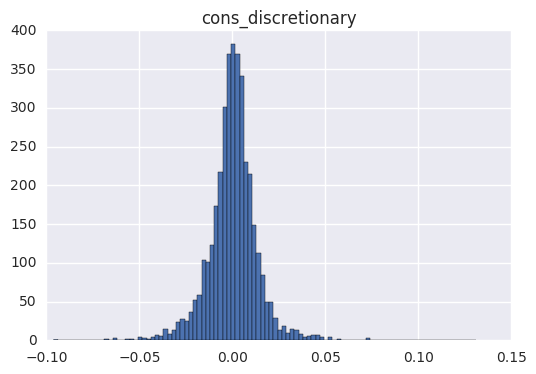

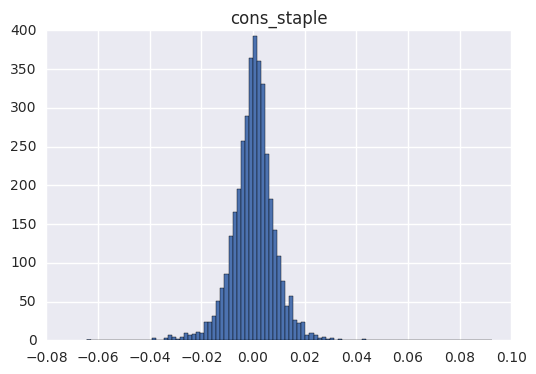

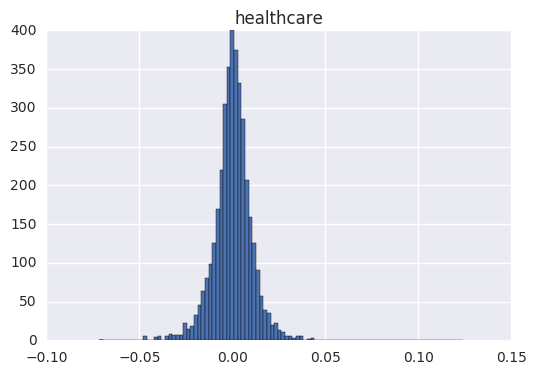

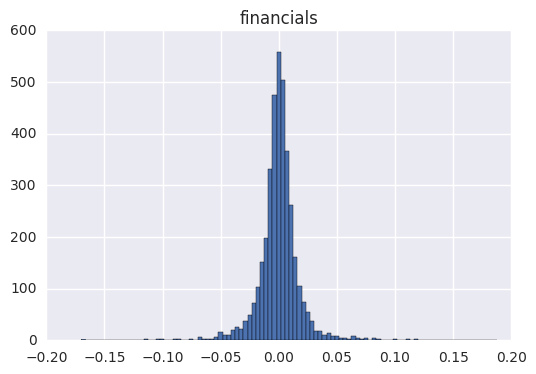

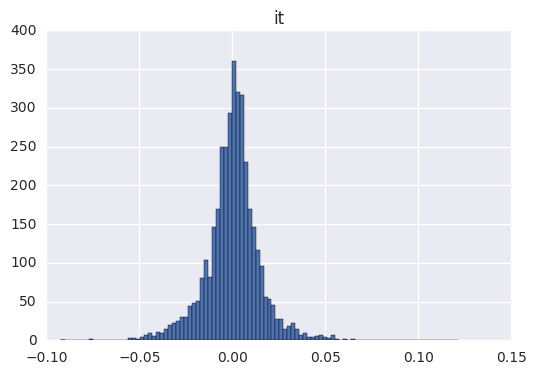

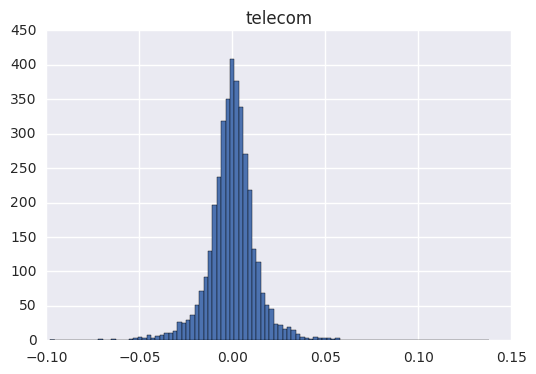

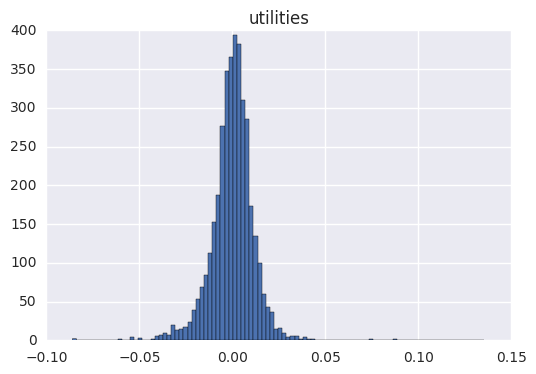

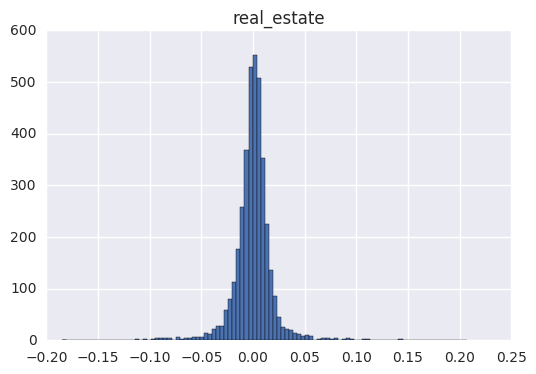

In [72]:
for c in df_returns.columns:
    fig = plt.figure()
    df_returns[c].hist(bins=100)
    plt.title(c)
    
df_returns.describe()

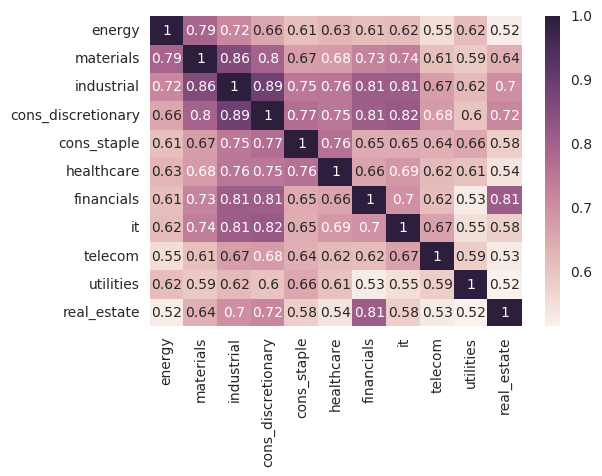

In [73]:
sns.heatmap(df_returns.corr(), annot=True)

# regimes for daily returns
Each red line shows the transition from one state to another. Other than a few sectors, this level of return data seems not to be robust enough, as the states oscillates too much even in the event of real high volatility regimes. However, it is interesting that the two states that we find are always positive mean with smaller variance, and negative mean with larger variance

sector                 state1                 state2
0               energy   N(1.22e-03,1.06e-04)  N(-1.32e-03,6.78e-04)
1            materials   N(1.23e-03,8.44e-05)  N(-1.29e-03,5.67e-04)
2           industrial   N(8.01e-04,5.86e-05)  N(-6.94e-04,4.45e-04)
3   cons_discretionary  N(-5.63e-04,4.46e-04)   N(8.90e-04,6.02e-05)
4          cons_staple  N(-2.36e-04,1.66e-04)   N(5.51e-04,3.48e-05)
5           healthcare  N(-2.88e-04,2.35e-04)   N(6.21e-04,4.83e-05)
6           financials  N(-6.94e-04,1.61e-03)   N(4.95e-04,8.66e-05)
7                   it  N(-5.89e-04,5.25e-04)   N(9.40e-04,6.87e-05)
8              telecom  N(-6.55e-04,5.20e-04)   N(3.57e-04,6.05e-05)
9            utilities   N(1.15e-03,5.35e-05)  N(-2.06e-03,3.78e-04)
10         real_estate  N(-1.50e-03,1.94e-03)   N(8.12e-04,9.48e-05)

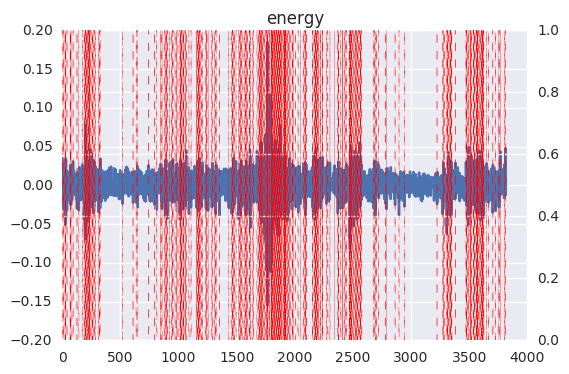

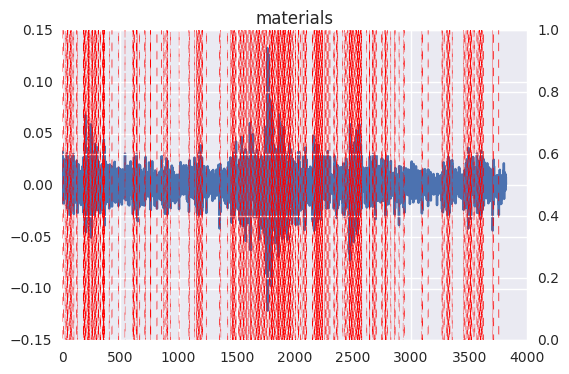

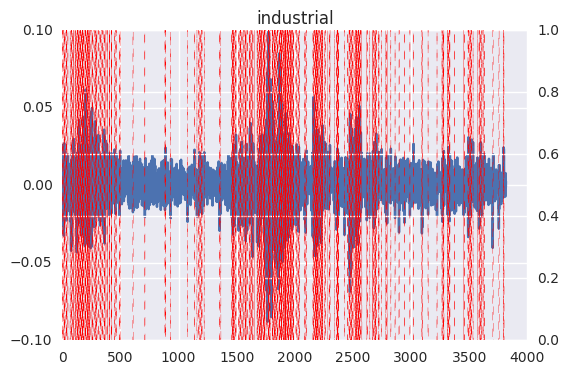

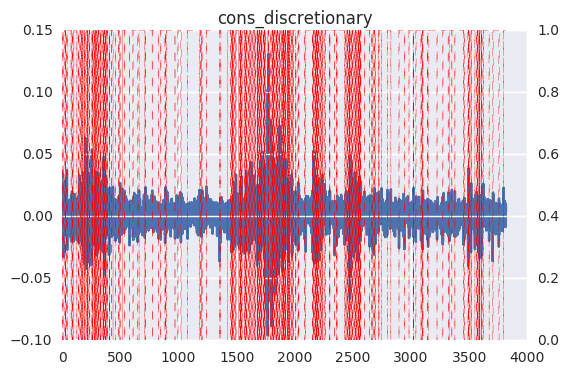

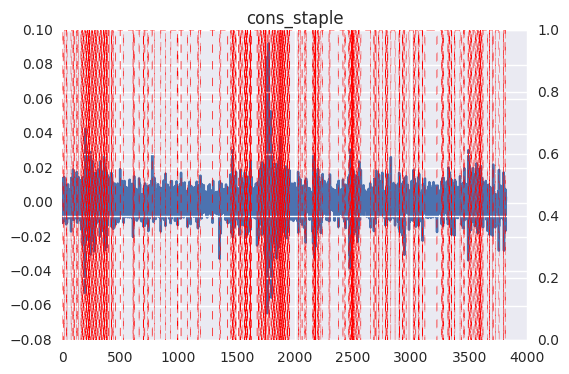

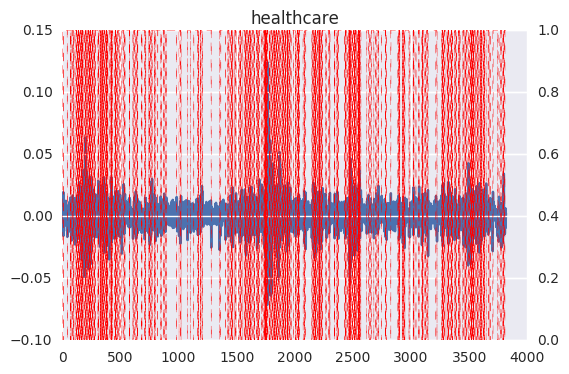

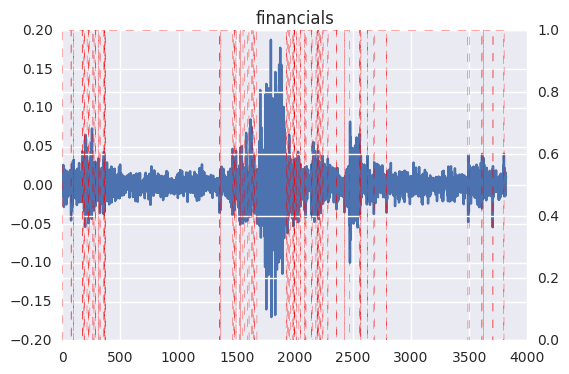

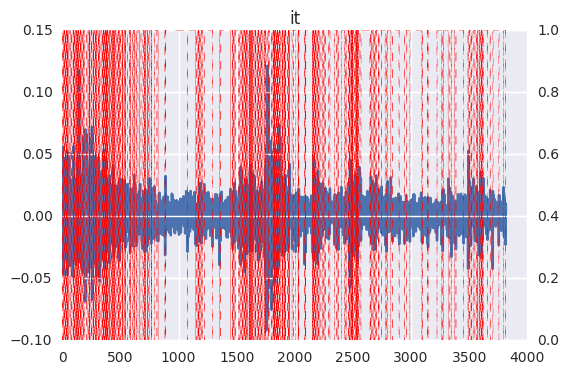

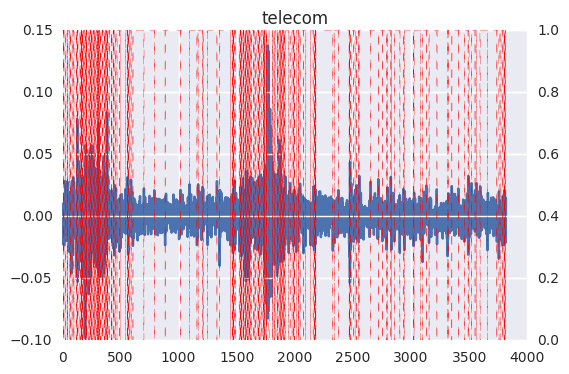

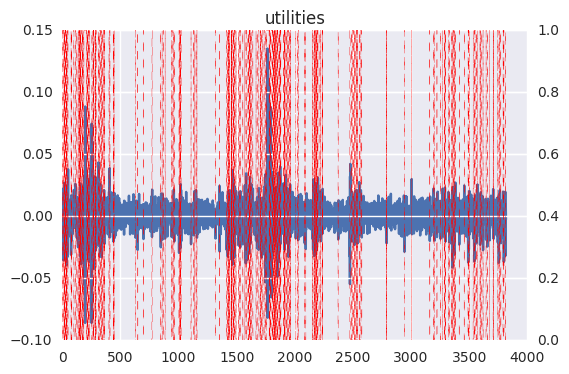

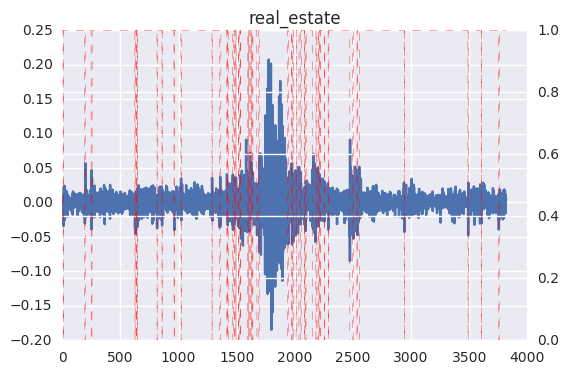

In [97]:
def hmm_df(dataframe):
    summary_df = pd.DataFrame([], columns=['sector', 'state1', 'state2'])
    for c in dataframe.columns:
        series = dataframe[c].values.reshape(-1,1)
        model = GaussianHMM(n_components=2)
        model.fit(series)
        states = model.predict(series)

        summary_df = summary_df.append(pd.DataFrame([[c, 
                                        'N({:.2e},{:.2e})'.format(model.means_[0][0], model.covars_[0][0][0]),
                                        'N({:.2e},{:.2e})'.format(model.means_[1][0], model.covars_[1][0][0])]]
                                       , columns=['sector', 'state1', 'state2']),
                                      ignore_index=True)
        fig, ax1 = plt.subplots()
        ax1.plot(series)
        ax2 = ax1.twinx()
        ax2.plot(states, 'r--', linewidth=0.25)
        plt.title(c)
    
    return(summary_df)

hmm_df(df_returns)

# create weekly returns and do the same analysis
We see much fewer transitions

In [93]:
def make_return(series):
    return((series + 1).prod())
pd.options.display.max_rows = 999
df_weekly = (df_returns.groupby([df_returns.index.map(lambda x: x.year), df_returns.index.map(lambda x: x.isocalendar()[1])])\
    .aggregate(make_return) - 1).ix[1:] # extraneous first row removed
df_weekly

energy  materials  industrial  cons_discretionary  \
2001 41  3.140301e-02   0.052389    0.042587            0.052956   
     42 -4.373031e-02  -0.026725   -0.027439           -0.022332   
     43  4.138622e-02   0.044590    0.045830            0.026287   
     44 -4.189586e-02  -0.008710   -0.015217           -0.009151   
     45  2.545211e-02   0.024539    0.041482            0.049520   
     46 -7.712046e-02   0.036468    0.020748            0.040771   
     47  3.553915e-02   0.019456    0.008589            0.010112   
     48 -2.006444e-02  -0.002998   -0.018805           -0.006394   
     49  2.017636e-02   0.001247    0.012292            0.016849   
     50 -2.866491e-02  -0.038602   -0.016100           -0.024355   
     51  3.494043e-02  -0.002590    0.051575            0.019927   
     52  3.711260e-02   0.018028    0.008287            0.024308   
2002 1   6.993838e-03   0.051172    0.016999            0.030937   
     2  -3.485787e-02  -0.051764   -0.046258           -0.025009   
     3  -1.509360e-02  -0.053065   -0.012428           -0.017352   
     4   3.667032e-02   0.071659    0.013495            0.002730   
     5  -1.103912e-03   0.011345   -0.021866            0.008507   
     6  -2.594657e-02  -0.001709   -0.017246           -0.001181   
     7   2.032360e-02   0.034901    0.008693            0.014653   
     8   2.852446e-02   0.010858    0.012041           -0.007574   
     9   2.792141e-02   0.025039    0.049103            0.035520   
     10  2.519663e-02   0.004511    0.032353            0.015996   
     11  2.185646e-02   0.016097   -0.009442            0.012157   
     12 -1.152386e-02  -0.016522   -0.028782           -0.018509   
     13  1.452859e-02   0.015140   -0.001909           -0.009148   
     14 -3.260207e-02  -0.021384   -0.011708           -0.015023   
     15 -3.185602e-02   0.010508   -0.023462            0.013896   
     16  4.917042e-02   0.005303   -0.016453            0.002717   
     17 -3.756368e-02  -0.045075   -0.048452           -0.032998   
     18  2.724720e-02   0.029197    0.011904           -0.007653   
     19 -2.777902e-02   0.010107   -0.023067           -0.020607   
     20  1.949399e-02   0.023668    0.058065            0.064498   
     21 -1.672543e-03   0.000944   -0.018023           -0.030719   
     22 -1.195381e-02  -0.015355   -0.021653           -0.014595   
     23 -1.888089e-02  -0.029341   -0.041019           -0.029835   
     24 -1.737587e-02  -0.021068   -0.011869           -0.024995   
     25  7.320435e-03   0.006190   -0.005428           -0.024338   
     26  2.675664e-02   0.022534   -0.001208           -0.004173   
     27 -4.596011e-04  -0.006086    0.005553            0.005848   
     28 -9.927350e-02  -0.061941   -0.062709           -0.084829   
     29 -1.010771e-01  -0.092219   -0.080732           -0.096043   
     30  2.021693e-02   0.033229    0.027654            0.012230   
     31 -2.499304e-02  -0.034320    0.013329           -0.028646   
     32  7.261932e-02   0.063458    0.058920            0.032587   
     33  2.820950e-02  -0.028745   -0.004172            0.063716   
     34 -6.263588e-03   0.011710    0.013227            0.023929   
     35 -1.557535e-02  -0.001665   -0.029826           -0.016514   
     36 -2.830987e-02  -0.030970   -0.030455           -0.001272   
     37 -3.321897e-03  -0.004589   -0.022275            0.008763   
     38 -4.305540e-02  -0.036141   -0.025258           -0.030556   
     39  8.279091e-03  -0.053041   -0.041252           -0.032977   
     40 -3.001302e-03  -0.024263   -0.035081           -0.045200   
     41  1.431330e-02   0.036143    0.028290            0.020651   
     42  5.426140e-02   0.043893    0.046306            0.058323   
     43 -3.303766e-02   0.000598    0.015933            0.038080   
     44  3.295798e-04   0.002648   -0.006919           -0.024304   
     45 -5.601010e-03  -0.005367   -0.000877           -0.013461   
     46 -8.283174e-04   0.017044   -0.013998            0.031627   
   

sector                 state1                 state2
0               energy  N(-4.21e-03,2.06e-03)   N(5.19e-03,4.86e-04)
1            materials   N(4.57e-03,3.88e-04)  N(-3.52e-03,2.13e-03)
2           industrial   N(3.52e-03,3.04e-04)  N(-2.15e-03,1.59e-03)
3   cons_discretionary  N(-1.19e-03,1.74e-03)   N(3.51e-03,3.14e-04)
4          cons_staple   N(2.42e-03,1.70e-04)  N(-1.62e-03,7.40e-04)
5           healthcare   N(1.95e-03,2.42e-04)  N(-6.11e-04,1.14e-03)
6           financials   N(2.41e-03,3.74e-04)  N(-3.82e-03,5.45e-03)
7                   it   N(5.29e-03,5.19e-04)  N(-2.25e-03,1.42e-03)
8              telecom   N(6.97e-04,3.34e-04)  N(-4.78e-04,1.44e-03)
9            utilities  N(-5.46e-03,1.26e-03)   N(3.91e-03,2.70e-04)
10         real_estate  N(-4.72e-03,4.13e-03)   N(3.50e-03,4.04e-04)

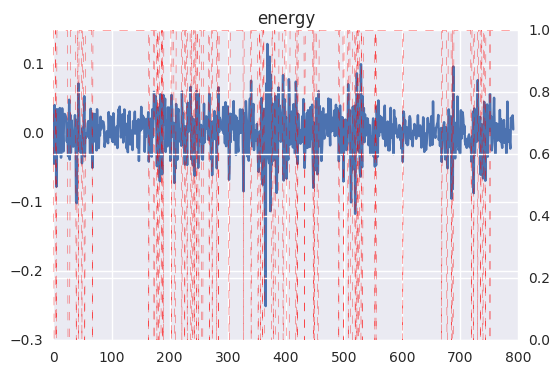

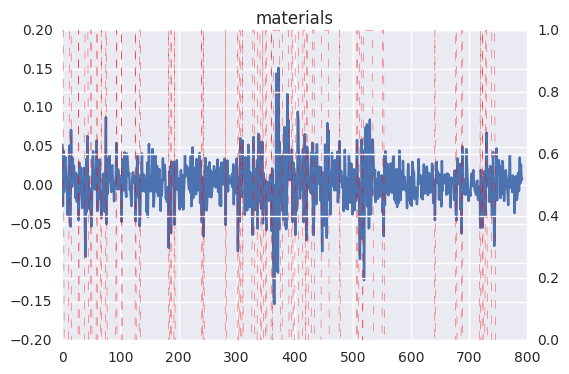

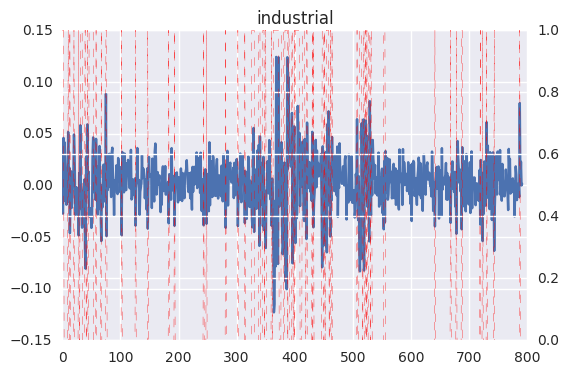

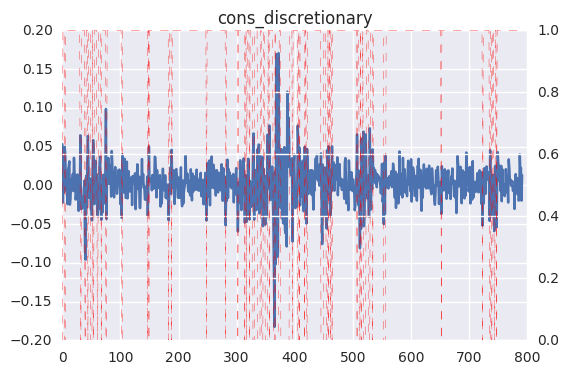

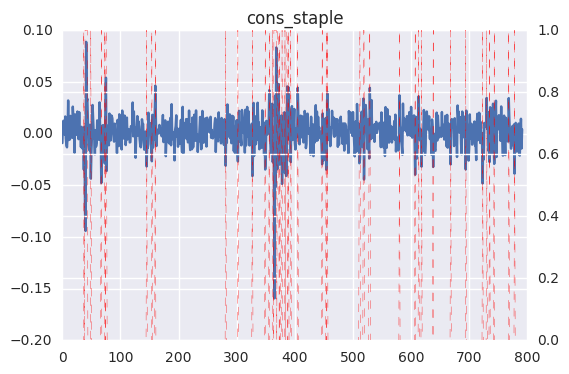

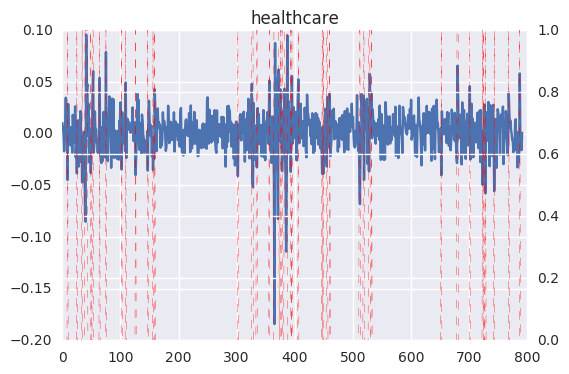

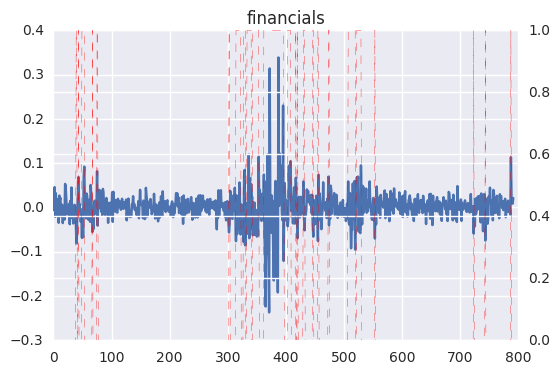

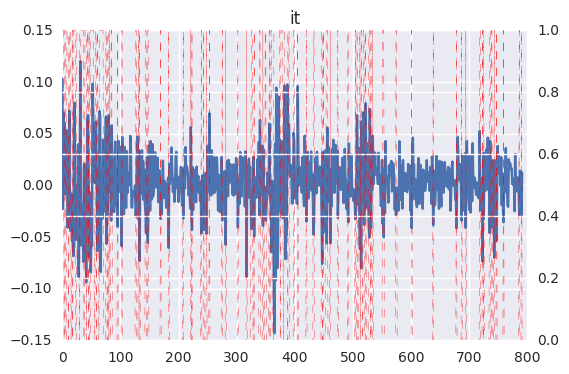

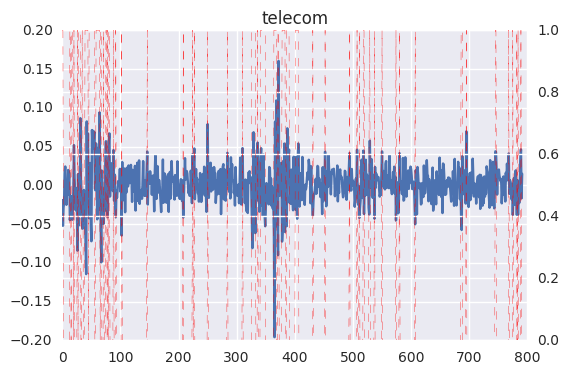

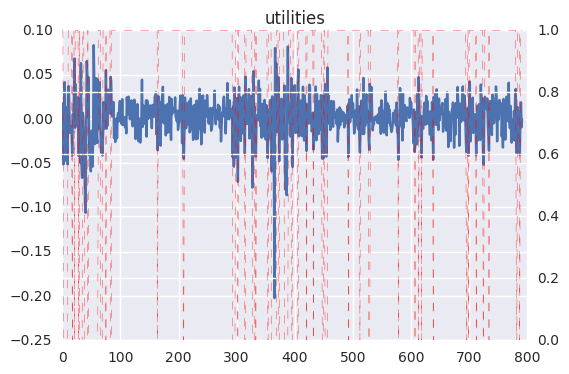

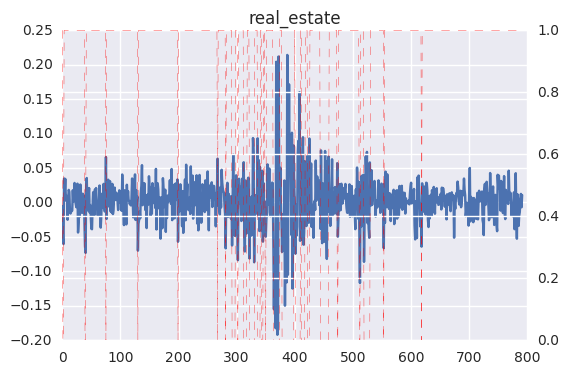

In [98]:
hmm_df(df_weekly)